In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.jit as jit
import torchvision.models as models

import torchvision
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt

# Define a transform to preprocess the data (you can customize this)
transform = transforms.Compose([transforms.ToTensor()])

In [22]:
# Download and load the Fashion MNIST dataset
train_dataset = torchvision.datasets.FashionMNIST(root="./data", train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.FashionMNIST(root="./data", train=False, transform=transform, download=True)

# Create data loaders to work with the data in batches
train_loader_MINST = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader_MINST = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

In [23]:
# Download and load the CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root="./data", train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.CIFAR10(root="./data", train=False, transform=transform, download=True)

# Create data loaders
train_loader_CIFAR = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader_CIFAR = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)


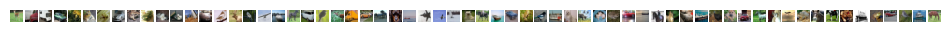

In [48]:

data_iter = iter(train_loader_CIFAR)
images, labels = next(data_iter)

class_labels = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress',
    'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

fig, axes = plt.subplots(1, len(images), figsize=(12, 3))
for i, image in enumerate(images):
 
    image = image.numpy()

    print(image.shape)
    image = image.transpose((1, 2, 0))

    axes[i].imshow(image)
    axes[i].axis('off')

plt.show()

(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)


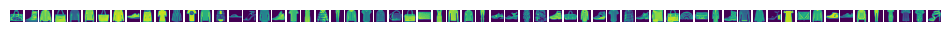

In [49]:
data_iter = iter(train_loader_MINST)
images, labels = next(data_iter)

class_labels = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress',
    'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

fig, axes = plt.subplots(1, len(images), figsize=(12, 3))
for i, image in enumerate(images):
 
    image = image.numpy()
    print(image.shape)
    image = image.transpose((1, 2, 0))

    axes[i].imshow(image)
    axes[i].axis('off')

plt.show()

In [26]:
class CNN_CIFAR(nn.Module):

    def __init__(self):

        super(CNN_CIFAR, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, padding=2)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, padding=2)

        # Fully connected layers
        self.fc1 = nn.Linear(in_features=32 * 8 * 8, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=10)  

    def forward(self, x):

        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 32 * 8 * 8)  
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)

        return x

In [64]:
class CNN_MINST(nn.Module):

    def __init__(self):

        super(CNN_MINST, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, padding=2)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, padding=2)

        # Fully connected layers
        self.fc1 = nn.Linear(in_features=32 * 7 * 7, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=10)  

    def forward(self, x):

        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 32 * 7 * 7)  
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)

        return x

In [69]:
class FNN_MINST(nn.Module):

    def __init__(self):

        super(CNN_MINST, self).__init__()

        # Fully connected layers
        self.fc1 = nn.Linear(in_features=784, out_features=784)
        self.fc2 = nn.Linear(in_features=784, out_features=784)
        self.fc3 = nn.Linear(in_features=784, out_features=784)
        self.fc4 = nn.Linear(in_features=784, out_features=128)
        self.fc5 = nn.Linear(in_features=128, out_features=10)  # Adjust num_classes

    def forward(self, x):

        x = self.fc1(x)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)

        return x

In [54]:
model_CIFAR = CNN_CIFAR()

lr_CIFAR = 0.001
model_parameters_CIFAR = model_CIFAR.parameters()
optimizer_CIFAR = optim.SGD(model_parameters_CIFAR, lr_CIFAR)
data_CIFAR = train_loader_CIFAR
loss_function_CIFAR = nn.CrossEntropyLoss()


In [65]:
model_MINST = CNN_MINST()

lr_MINST = 0.001
model_parameters_MINST = model_MINST.parameters()
optimizer_MINST = optim.SGD(model_parameters_MINST, lr_MINST)
data_MINST = train_loader_MINST
loss_function_MINST = nn.CrossEntropyLoss()

In [63]:
num_epochs_CIFAR = 100

loss_list_CIFAR = []
epoch_list_CIFAR = []

for epoch in range(num_epochs_CIFAR):
    for batch_data, batch_labels in train_loader_CIFAR:
        optimizer_CIFAR.zero_grad()
        outputs = model_CIFAR(batch_data)

        print(outputs.shape)
        print(batch_data.shape)

        loss = loss_function_CIFAR(outputs, batch_labels)

        loss_list_CIFAR.append(loss)
        epoch_list_CIFAR.append(epoch)

        loss.backward()
        optimizer_CIFAR.step()

    if (epoch + 1) % 1 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs_CIFAR}] Loss: {loss.item()}')

print("Training completed.")

plt.plot(epoch_list_CIFAR, loss_list_CIFAR, label = "loss history")
plt.lengend()
plt.grid()
plt.show()

torch.Size([64, 10])
torch.Size([64, 3, 32, 32])
torch.Size([64, 10])
torch.Size([64, 3, 32, 32])
torch.Size([64, 10])
torch.Size([64, 3, 32, 32])
torch.Size([64, 10])
torch.Size([64, 3, 32, 32])
torch.Size([64, 10])
torch.Size([64, 3, 32, 32])
torch.Size([64, 10])
torch.Size([64, 3, 32, 32])
torch.Size([64, 10])
torch.Size([64, 3, 32, 32])
torch.Size([64, 10])
torch.Size([64, 3, 32, 32])
torch.Size([64, 10])
torch.Size([64, 3, 32, 32])
torch.Size([64, 10])
torch.Size([64, 3, 32, 32])
torch.Size([64, 10])
torch.Size([64, 3, 32, 32])
torch.Size([64, 10])
torch.Size([64, 3, 32, 32])
torch.Size([64, 10])
torch.Size([64, 3, 32, 32])
torch.Size([64, 10])
torch.Size([64, 3, 32, 32])
torch.Size([64, 10])
torch.Size([64, 3, 32, 32])
torch.Size([64, 10])
torch.Size([64, 3, 32, 32])
torch.Size([64, 10])
torch.Size([64, 3, 32, 32])
torch.Size([64, 10])
torch.Size([64, 3, 32, 32])
torch.Size([64, 10])
torch.Size([64, 3, 32, 32])
torch.Size([64, 10])
torch.Size([64, 3, 32, 32])
torch.Size([64, 10])

KeyboardInterrupt: 

In [67]:
num_epochs_MINST = 100

loss_list_MINST = []
epoch_list_MINST = []

for epoch in range(num_epochs_MINST):
    for batch_data, batch_labels in train_loader_MINST:
        optimizer_MINST.zero_grad()
        outputs = model_MINST(batch_data)

        loss = loss_function_MINST(outputs, batch_labels)

        loss_list_MINST.append(loss)
        epoch_list_MINST.append(epoch)

        loss.backward()
        optimizer_MINST.step()

    if (epoch + 1) % 1 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs_MINST}] Loss: {loss.item()}')

print("Training completed.")

plt.plot(epoch_list_MINST, loss_list_MINST, label = "loss history")
plt.lengend()
plt.grid()
plt.show()

Epoch [1/100] Loss: 2.099369525909424


KeyboardInterrupt: 

In [38]:
model_MINST_FNN = CNN_MINST()

lr_MINST_FNN = 0.001
model_parameters_MINST_FNN = model_MINST_FNN.parameters()
optimizer_MINST_FNN = optim.SGD(model_parameters_MINST_FNN, lr_MINST)
data_MINST_FNN = train_loader_MINST
loss_function_MINST_FNN = nn.CrossEntropyLoss()

In [68]:
num_epochs_MINST_FNN = 100

loss_list_MINST_FNN = []
epoch_list_MINST_FNN = []

for epoch in range(num_epochs_MINST_FNN):
    for batch_data, batch_labels in train_loader_MINST:
        optimizer_MINST_FNN.zero_grad()
        outputs = model_MINST_FNN(batch_data)
        loss = loss_function_MINST_FNN(outputs, batch_labels)

        loss_list_MINST_FNN.append(loss)
        epoch_list_MINST_FNN.append(epoch)

        loss.backward()
        optimizer_MINST_FNN.step()

    if (epoch + 1) % 1 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs_MINST}] Loss: {loss.item()}')

print("Training completed.")

plt.plot(epoch_list_MINST, loss_list_MINST, label = "loss history")
plt.lengend()
plt.grid()
plt.show()

ValueError: Expected input batch_size (196) to match target batch_size (64).